<a href="https://colab.research.google.com/github/PvrpleJade/AIDA-2/blob/main/LogisticRegression_(Kakegurui).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
In logistic regression we perform binary classification of by learnig a function of the form $f_w(x) = \sigma(x^\top w)$. Here $x,w \in \mathbb{R}^D$, where $D$ is the number of features as before. $\sigma(z) = \frac{1}{1+e^{-z}}$ is the logistic function.  Let's plot this function below

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
gs = pd.read_excel("/content/drive/My Drive/class list aida 2/Global Superstore-2.xls")
gs.head(1000)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.6500,7,0.00,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.3950,9,0.10,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.1710,9,0.10,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.5100,5,0.10,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.9600,8,0.00,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24278,IN-2014-48625,2014-04-01,2014-04-05,Standard Class,JF-15415,Jennifer Ferguson,Consumer,Liaoyang,Liaoning,...,FUR-TA-10001633,Furniture,Tables,"Bevis Wood Table, with Bottom Storage",2614.6890,7,0.30,-821.9610,203.260,Medium
996,34815,US-2013-113649,2013-08-10,2013-08-13,First Class,HA-14920,Helen Andreada,Consumer,Fayetteville,North Carolina,...,OFF-AP-10002518,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center,569.5360,4,0.20,64.0728,203.220,High
997,30517,IN-2013-85662,2013-10-17,2013-10-19,Second Class,CK-12595,Clytie Kelty,Consumer,Taupo,Waikato,...,TEC-CO-10003226,Technology,Copiers,"Canon Fax Machine, Laser",636.7800,2,0.00,286.5000,203.200,Critical
998,1408,MX-2013-152996,2013-01-19,2013-01-26,Standard Class,SS-20140,Saphhira Shifley,Corporate,Araguaína,Tocantins,...,FUR-BO-10002766,Furniture,Bookcases,"Bush Classic Bookcase, Traditional",2751.2000,10,0.00,110.0000,203.132,Medium


In [5]:
gs['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [6]:
gs.groupby('Sales').mean()

,Row ID,Postal Code,Quantity,Discount,Profit,Shipping Cost
Sales,,,,,,
0.444,35398.0,77095.0,1.0,0.8,-1.1100,0.01000
0.556,40589.0,76706.0,1.0,0.8,-0.9452,0.08000
0.836,39955.0,60623.0,1.0,0.8,-1.3376,0.06000
0.852,36008.0,19120.0,1.0,0.7,-0.5964,0.10000
0.876,33403.0,75150.0,1.0,0.8,-1.4016,0.09000
...,...,...,...,...,...,...
10499.970,35487.0,19711.0,3.0,0.0,5039.9856,363.19000
11199.968,33920.0,10024.0,4.0,0.2,3919.9888,45.98000
13999.960,39450.0,98115.0,4.0,0.0,6719.9808,20.00054


In [7]:
gs.groupby('Quantity').mean()

,Row ID,Postal Code,Sales,Discount,Profit,Shipping Cost
Quantity,,,,,,
1,35358.781546,53740.661846,73.607848,0.158157,7.254517,8.198517
2,25982.922890,55136.025396,143.377868,0.145080,16.360682,15.912255
3,20260.854266,54924.250311,208.411753,0.132686,24.323615,22.296729
4,26073.542835,54862.481948,293.739462,0.142856,34.724614,31.938996
5,20400.933634,56694.857724,369.689763,0.134484,46.477984,39.259358
6,25622.236424,55051.805944,433.236644,0.144435,41.426103,45.304544
7,20562.321174,55723.661716,490.473456,0.134631,66.821232,52.227590
8,26173.283615,56692.369650,549.647861,0.143802,61.538104,57.029425
9,20782.828774,54736.406977,605.642357,0.132233,74.818913,64.426032


In [8]:
gs.groupby('Discount').mean()

,Row ID,Postal Code,Sales,Quantity,Profit,Shipping Cost
Discount,,,,,,
0.000,26150.307973,51853.503543,241.042813,3.404736,61.039514,25.704315
0.002,4835.136659,NaN,567.018701,3.594360,125.762649,59.794868
0.070,25435.993333,NaN,810.779022,3.553333,140.990022,88.632600
0.100,21410.222222,17730.095745,388.300485,3.789823,63.683426,42.081689
0.150,17817.871460,92498.192308,618.474630,3.708061,56.855240,70.295163
0.150,25206.865854,NaN,270.121811,3.890244,15.601811,29.185366
0.170,25301.648980,NaN,336.597556,3.700680,38.317107,36.138386
0.200,28517.027011,60718.534044,240.862803,3.732093,23.552594,25.991837
0.202,4803.829268,NaN,395.503592,3.292683,-14.518847,34.442171


In [9]:
gs.groupby('Profit').mean()

,Row ID,Postal Code,Sales,Quantity,Discount,Shipping Cost
Profit,,,,,,
-6599.9780,39069.0,43130.0,4499.985,5.0,0.7,451.63000
-4088.3760,48663.0,NaN,3085.344,12.0,0.6,51.89000
-3839.9904,31980.0,27217.0,7999.980,4.0,0.5,674.82000
-3701.8928,41071.0,78207.0,2177.584,8.0,0.8,172.07000
-3399.9800,34308.0,80027.0,2549.985,5.0,0.7,120.31000
...,...,...,...,...,...,...
4630.4755,35395.0,55407.0,9449.950,5.0,0.0,655.61000
4946.3700,40336.0,48205.0,9892.740,13.0,0.0,498.70000
5039.9856,35487.0,19711.0,10499.970,3.0,0.0,363.19000


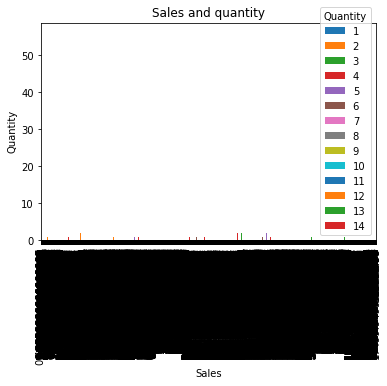

In [10]:
%matplotlib inline
pd.crosstab(gs.Sales,gs.Quantity).plot(kind='bar')
plt.title('Sales and quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.savefig('Sales_quant')